In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Describe your dataset. 
Describe and explore your dataset in the initial section of your Report. What does your data contain and what is its background? Where does it come from? Why is it interesting or significant? Conduct summary statistics and produce visualizations for the particular variables from the dataset that you will use.

## Dataset: The Civil Rights Data Collection, school-level data for 2015-2016

The Civil Rights Data Collection (CRDC) is a biennial survey required by the U.S. Department of Education’s (Department) Office for Civil Rights (OCR) since 1968. (Note, howerever, that survey content changes over time.)

The 2015–16 CRDC collects data from all public local educational agencies (LEAs, ie *School Districts*) and schools, including 
- long-term secure juvenile justice facilities
- charter schools
- alternative schools
- and schools serving students with disabilities

with a responce rate of 99.8% from __17,337 LEAs and 96,360 schools__. Speicifically, I will be looking at the finer-grained *data disagregated by school*.

### Data content and format
Each school (row) in the dataset includes 1,800 columns (typically a student count disagregated by race and gender) regarding 32 general topics, (__the topics I will investigate are in bold__):

__'Identification', 'School Characteristics', 'Enrollment','Suspensions', 'Expulsions', 'Transfers', 'Referrals and Arrests', 'Offenses', 'Restraint and Seclusion', 'Chronic Absenteeism', 'Retention', 'Justice Facility',__ 
       'Gifted and Talented', 'Dual Enrollment', 'Credit Recovery',
       'Algebra I', 'Geometry', 'Algebra II', 'Calculus',
       'Advanced Mathematics', 'Biology', 'Chemistry', 'Physics',
       'Single-sex Classes', 'Advanced Placement',
       'International Baccalaureate', 'SAT and ACT Exams',
       'Corporal Punishment',
       'Harassment and Bullying',
       'Single-Sex Athletics', 'School Expenditures', 'School Support',
       


### Known issues with dataset
From the CRDC report: "An important consideration for response rates is that the reporting process requires all schools and LEAs to respond to each survey item on the CRDC. Some LEAs, that did not have complete data, __reported a zero value__. It is not possible to determine all possible situations where this may have occurred. As such, it may be the case that the item response rates may be positively biased. For the large majority of CRDC survey items, __the rate of missing data ranged from 0-5% of reported values__."

In [7]:
cols_description = pd.read_csv('data (download CSVs here)/CRDC 2015-16 School Data Record Layout.csv', encoding="ISO-8859-1")
cols_description['Module'].unique()

array(['Identification', 'School Characteristics', 'Enrollment',
       'Gifted and Talented', 'Dual Enrollment', 'Credit Recovery',
       'Algebra I', 'Geometry', 'Algebra II', 'Calculus',
       'Advanced Mathematics', 'Biology', 'Chemistry', 'Physics',
       'Single-sex Classes', 'Advanced Placement',
       'International Baccalaureate', 'SAT and ACT Exams',
       'Corporal Punishment', 'Suspensions', 'Expulsions', 'Transfers',
       'Referrals and Arrests', 'Offenses', 'Restraint and Seclusion',
       'Harassment and Bullying', 'Chronic Absenteeism', 'Retention',
       'Single-Sex Athletics', 'School Expenditures', 'School Support',
       'Justice Facility'], dtype=object)

In [8]:
modules_of_interest = ['Identification', 'School Characteristics', 'Enrollment','Suspensions', 'Expulsions', 'Transfers', 'Referrals and Arrests', 'Offenses', 'Restraint and Seclusion', 'Chronic Absenteeism', 'Retention', 'School Support', 'Justice Facility']
# Get all cols within our modules of interest
cols_of_interest = cols_description[cols_description['Module'].isin(modules_of_interest)]
cols_of_interest['Field_Name']

0                   LEA_STATE
1              LEA_STATE_NAME
2                       LEAID
3                    LEA_NAME
4                       SCHID
5                    SCH_NAME
6                    COMBOKEY
7                          JJ
8                SCH_GRADE_PS
9                SCH_GRADE_KG
10              SCH_GRADE_G01
11              SCH_GRADE_G02
12              SCH_GRADE_G03
13              SCH_GRADE_G04
14              SCH_GRADE_G05
15              SCH_GRADE_G06
16              SCH_GRADE_G07
17              SCH_GRADE_G08
18              SCH_GRADE_G09
19              SCH_GRADE_G10
20              SCH_GRADE_G11
21              SCH_GRADE_G12
22               SCH_GRADE_UG
23            SCH_UGDETAIL_ES
24            SCH_UGDETAIL_MS
25            SCH_UGDETAIL_HS
26            SCH_STATUS_SPED
27          SCH_STATUS_MAGNET
28         SCH_STATUS_CHARTER
29             SCH_STATUS_ALT
                ...          
1777            TOT_RET_G12_M
1778            TOT_RET_G12_F
1779      

## Load and Format the data (after downloading)
[Download the 400MB file here.](https://drive.google.com/file/d/1yOqzjwinFp4THrDX0s543LtIEXO9B-Ap/view?usp=sharing)

Note that this file is *identical* to the one that can be downloaded [on the CRDC website](https://www2.ed.gov/about/offices/list/ocr/data.html)

In [6]:
# In take data
DATA_FILE = 'data (download CSVs here)/CRDC 2015-16 School Data.csv'
crdc_data = pd.read_csv(
    DATA_FILE,
    usecols=cols_of_interest['Field_Name'],
    low_memory=False,
    encoding="ISO-8859-1"
)
crdc_data

NameError: name 'cols_of_interest' is not defined

In [48]:
crdc_data.dtypes

LEA_STATE                 object
LEA_STATE_NAME            object
LEAID                     object
LEA_NAME                  object
SCHID                     object
SCH_NAME                  object
COMBOKEY                  object
JJ                        object
SCH_GRADE_PS              object
SCH_GRADE_KG              object
SCH_GRADE_G01             object
SCH_GRADE_G02             object
SCH_GRADE_G03             object
SCH_GRADE_G04             object
SCH_GRADE_G05             object
SCH_GRADE_G06             object
SCH_GRADE_G07             object
SCH_GRADE_G08             object
SCH_GRADE_G09             object
SCH_GRADE_G10             object
SCH_GRADE_G11             object
SCH_GRADE_G12             object
SCH_GRADE_UG              object
SCH_UGDETAIL_ES           object
SCH_UGDETAIL_MS           object
SCH_UGDETAIL_HS           object
SCH_STATUS_SPED           object
SCH_STATUS_MAGNET         object
SCH_STATUS_CHARTER        object
SCH_STATUS_ALT            object
          

#### The raw CRDC unhelpfully converted large ID values to scientific notation, so we'll reconstruct the IDs, which are a combination of district, school, and state IDs

In [49]:
crdc_data[-1:]['COMBOKEY'].values[0]#get('COMBOKEY')
# LIMIT TO JUST NORTH CAROLINA (FOR DEVELOPMENT SPEED)
# data = crdc_data[crdc_data['LEA_STATE'] == 'NC'] 

'5.68025E+11'

#### Create the NCESSCH field on the CRDC Data

In [50]:
def f(row):
    return str(row['LEAID']) + str(row['SCHID']).zfill(5)

crdc_data['NCESSCH'] = crdc_data.apply(f, axis='columns')

## Merge with Lat/Long coordinate data

#### A. Merge with Public School Data

In [51]:
LAT_LONG_FILE = 'EDGE_GEOCODE_PUBLICSCH_1516/EDGE_GEOCODE_PUBLICSCH_1516.csv'
lat_long_cols_of_interest = ['NCESSCH', 'LAT1516', 'LON1516', 'NAME']
school_lat_longs = pd.read_csv(
    LAT_LONG_FILE,
    usecols=lat_long_cols_of_interest,
    dtype={'NCESSCH': int},
    low_memory=False,
    encoding = "ISO-8859-1"
)
school_lat_longs['NCESSCH'] = school_lat_longs['NCESSCH'].apply(str)
school_lat_longs.dtypes

NCESSCH     object
NAME        object
LAT1516    float64
LON1516    float64
dtype: object

In [52]:
# Join on SCHOOL CODE. 
final = crdc_data.merge(
    school_lat_longs,
    how='left',
    left_on='NCESSCH',
    right_on='NCESSCH',
)
final

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,JJ,SCH_GRADE_PS,SCH_GRADE_KG,...,SCH_JJHOURS,SCH_JJPART_LT15,SCH_JJPART_15T30,SCH_JJPART_31T90,SCH_JJPART_91T180,SCH_JJPART_OV180,NCESSCH,NAME,LAT1516,LON1516
0,AL,ALABAMA,100002,Alabama Youth Services,1705,Wallace Sch - Mt Meigs Campus,10000201705,Yes,No,No,...,-7,-7,-7,-7,-7,-7,10000201705,Wallace Sch - Mt Meigs Campus,32.374812,-86.082360
1,AL,ALABAMA,100002,Alabama Youth Services,1706,McNeel Sch - Vacca Campus,10000201706,Yes,No,No,...,-7,-7,-7,-7,-7,-7,10000201706,McNeel Sch - Vacca Campus,33.583385,-86.710058
2,AL,ALABAMA,100002,Alabama Youth Services,1876,Alabama Youth Services,10000201876,No,No,No,...,-9,-9,-9,-9,-9,-9,10000201876,Alabama Youth Services,32.374847,-86.082332
3,AL,ALABAMA,100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,10000299995,Yes,No,No,...,-7,-7,-7,-7,-7,-7,10000299995,NaN,NaN,NaN
4,AL,ALABAMA,100005,Albertville City,870,Albertville Middle School,10000500870,No,No,No,...,-9,-9,-9,-9,-9,-9,10000500870,Ala Avenue Middle Sch,34.260194,-86.206174
5,AL,ALABAMA,100005,Albertville City,871,Albertville High Sch,10000500871,No,No,No,...,-9,-9,-9,-9,-9,-9,10000500871,Albertville High Sch,34.262154,-86.204863
6,AL,ALABAMA,100005,Albertville City,879,Evans Elem Sch,10000500879,No,No,No,...,-9,-9,-9,-9,-9,-9,10000500879,Evans Elem Sch,34.273161,-86.220086
7,AL,ALABAMA,100005,Albertville City,889,Albertville Elem Sch,10000500889,No,No,No,...,-9,-9,-9,-9,-9,-9,10000500889,Albertville Elem Sch,34.253251,-86.221834
8,AL,ALABAMA,100005,Albertville City,1616,Big Spring Lake Kinderg Sch,10000501616,No,Yes,Yes,...,-9,-9,-9,-9,-9,-9,10000501616,Big Spring Lake Kinderg Sch,34.290220,-86.192490
9,AL,ALABAMA,100005,Albertville City,2150,Albertville Primary Sch,10000502150,No,Yes,No,...,-9,-9,-9,-9,-9,-9,10000502150,Albertville Primary Sch,34.253251,-86.221834


#### We're still missing lat/long for a substantial # of schools

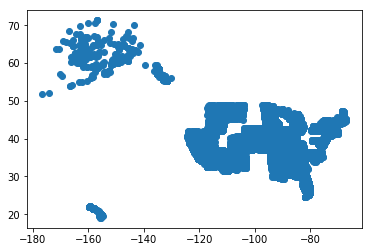

In [53]:
plt.scatter(x=final['LON1516'], y=final['LAT1516'])

#### B. Merge with LEA (District) Data

In [57]:
LEA_LAT_LONG_FILE = 'EDGE_GEOCODE_PUBLICLEA_1516/EDGE_GEOCODE_PUBLICLEA_1516.csv'
lea_lat_long_cols_of_interest = ['LEAID', 'LAT1516', 'LON1516']
lea_lat_longs = pd.read_csv(
    LEA_LAT_LONG_FILE,
    usecols=lea_lat_long_cols_of_interest,
    dtype={'LEAID': str},
    low_memory=False,
    encoding = "ISO-8859-1"
)
lea_lat_longs = lea_lat_longs.rename(index=str, columns={"LAT1516": "LEA_LAT1516", "LON1516": "LEA_LON1516"})
lea_lat_longs

,LEAID,LEA_LAT1516,LEA_LON1516
0,0100240,32.462750,-86.474211
1,0100270,30.911431,-87.787485
2,0100300,31.878283,-85.453785
3,0101410,31.868304,-85.151290
4,0100028,33.167521,-87.191200
5,0100360,32.945405,-87.143254
6,0100420,33.945640,-86.476448
7,0102550,33.933262,-86.495930
8,0100480,32.144541,-85.716350
9,0100510,31.815298,-86.628715


In [58]:
lea_lat_longs.dtypes

LEAID           object
LEA_LAT1516    float64
LEA_LON1516    float64
dtype: object

In [59]:
# Join on LEA CODE. 
final_2 = final.merge(
    lea_lat_longs,
    how='left',
    left_on='LEAID',
    right_on='LEAID',
)
final_2

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,JJ,SCH_GRADE_PS,SCH_GRADE_KG,...,SCH_JJPART_15T30,SCH_JJPART_31T90,SCH_JJPART_91T180,SCH_JJPART_OV180,NCESSCH,NAME,LAT1516,LON1516,LEA_LAT1516,LEA_LON1516
0,AL,ALABAMA,100002,Alabama Youth Services,1705,Wallace Sch - Mt Meigs Campus,10000201705,Yes,No,No,...,-7,-7,-7,-7,10000201705,Wallace Sch - Mt Meigs Campus,32.374812,-86.082360,NaN,NaN
1,AL,ALABAMA,100002,Alabama Youth Services,1706,McNeel Sch - Vacca Campus,10000201706,Yes,No,No,...,-7,-7,-7,-7,10000201706,McNeel Sch - Vacca Campus,33.583385,-86.710058,NaN,NaN
2,AL,ALABAMA,100002,Alabama Youth Services,1876,Alabama Youth Services,10000201876,No,No,No,...,-9,-9,-9,-9,10000201876,Alabama Youth Services,32.374847,-86.082332,NaN,NaN
3,AL,ALABAMA,100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,10000299995,Yes,No,No,...,-7,-7,-7,-7,10000299995,NaN,NaN,NaN,NaN,NaN
4,AL,ALABAMA,100005,Albertville City,870,Albertville Middle School,10000500870,No,No,No,...,-9,-9,-9,-9,10000500870,Ala Avenue Middle Sch,34.260194,-86.206174,NaN,NaN
5,AL,ALABAMA,100005,Albertville City,871,Albertville High Sch,10000500871,No,No,No,...,-9,-9,-9,-9,10000500871,Albertville High Sch,34.262154,-86.204863,NaN,NaN
6,AL,ALABAMA,100005,Albertville City,879,Evans Elem Sch,10000500879,No,No,No,...,-9,-9,-9,-9,10000500879,Evans Elem Sch,34.273161,-86.220086,NaN,NaN
7,AL,ALABAMA,100005,Albertville City,889,Albertville Elem Sch,10000500889,No,No,No,...,-9,-9,-9,-9,10000500889,Albertville Elem Sch,34.253251,-86.221834,NaN,NaN
8,AL,ALABAMA,100005,Albertville City,1616,Big Spring Lake Kinderg Sch,10000501616,No,Yes,Yes,...,-9,-9,-9,-9,10000501616,Big Spring Lake Kinderg Sch,34.290220,-86.192490,NaN,NaN
9,AL,ALABAMA,100005,Albertville City,2150,Albertville Primary Sch,10000502150,No,Yes,No,...,-9,-9,-9,-9,10000502150,Albertville Primary Sch,34.253251,-86.221834,NaN,NaN


#### (942 Schools have *no* lat/long data available, not even for LEA)

In [60]:
final_2[pd.isnull(final_2['LEA_LAT1516']) & pd.isnull(final_2['LAT1516'])]

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,JJ,SCH_GRADE_PS,SCH_GRADE_KG,...,SCH_JJPART_15T30,SCH_JJPART_31T90,SCH_JJPART_91T180,SCH_JJPART_OV180,NCESSCH,NAME,LAT1516,LON1516,LEA_LAT1516,LEA_LON1516
3,AL,ALABAMA,100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,10000299995,Yes,No,No,...,-7,-7,-7,-7,10000299995,NaN,NaN,NaN,NaN,NaN
69,AL,ALABAMA,100021,Brewer-Porch Childrens Center,1832,Brewer Porch Children's Ctr,10002101832,No,Yes,Yes,...,-9,-9,-9,-9,10002101832,NaN,NaN,NaN,NaN,NaN
70,AL,ALABAMA,100022,Sequel TSI Courtland,1833,Three Springs Courtland Sch,10002201833,No,No,No,...,-9,-9,-9,-9,10002201833,NaN,NaN,NaN,NaN,NaN
71,AL,ALABAMA,100023,Sequel Madison TSI,1834,Sequel Madison TSI,10002301834,No,No,No,...,-9,-9,-9,-9,10002301834,NaN,NaN,NaN,NaN,NaN
72,AL,ALABAMA,100024,Sequel TSI- New Beginnings School/ Owens Cross...,1835,Three Springs New Beginnings,10002401835,No,No,No,...,-9,-9,-9,-9,10002401835,NaN,NaN,NaN,NaN,NaN
73,AL,ALABAMA,100026,Sequel TSI Tuskegee,2352,Sequel TSI Tuskegee LLC,10002602352,No,No,No,...,-9,-9,-9,-9,10002602352,NaN,NaN,NaN,NaN,NaN
79,AL,ALABAMA,100033,Glenwood Mental Health Services,99998,Allan Cott,10003399998,No,No,No,...,-9,-9,-9,-9,10003399998,NaN,NaN,NaN,NaN,NaN
80,AL,ALABAMA,100033,Glenwood Mental Health Services,99999,Lakeview,10003399999,No,No,Yes,...,-9,-9,-9,-9,10003399999,NaN,NaN,NaN,NaN,NaN
81,AL,ALABAMA,100035,Learning Tree Inc,1845,Learning Tree Inc Semmes,10003501845,No,Yes,No,...,-9,-9,-9,-9,10003501845,NaN,NaN,NaN,NaN,NaN
82,AL,ALABAMA,100035,Learning Tree Inc,1846,Learning Tree Inc Webb,10003501846,No,Yes,No,...,-9,-9,-9,-9,10003501846,NaN,NaN,NaN,NaN,NaN


#### LEA lat/longs fill in the remaining schools locations (minus 942 schools)

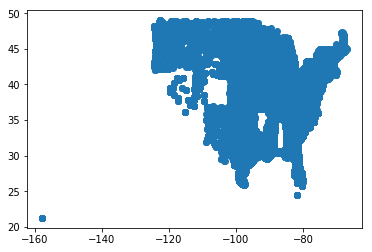

In [64]:
plt.scatter(x=final_2['LEA_LON1516'], y=final_2['LEA_LAT1516'])

#### Where there were no school-level Lat/Long, use LEA (district) Lat/Longs.
Note that there are 942 schools with neither school-level or LEA-level coordinates.

In [66]:
final_2.loc[pd.isnull(final_2['LAT1516']), 'LAT1516'] = final_2['LEA_LAT1516']
final_2.loc[pd.isnull(final_2['LON1516']), 'LON1516'] = final_2['LEA_LON1516']

# final_2[pd.isnull(final_2['LON1516'])]
final_2.describe()

,SCH_PSENR_HI_M,SCH_PSENR_HI_F,SCH_PSENR_AM_M,SCH_PSENR_AM_F,SCH_PSENR_AS_M,SCH_PSENR_AS_F,SCH_PSENR_HP_M,SCH_PSENR_HP_F,SCH_PSENR_BL_M,SCH_PSENR_BL_F,...,SCH_JJHOURS,SCH_JJPART_LT15,SCH_JJPART_15T30,SCH_JJPART_31T90,SCH_JJPART_91T180,SCH_JJPART_OV180,LAT1516,LON1516,LEA_LAT1516,LEA_LON1516
count,96360.000000,96360.000000,96360.000000,96360.000000,96360.000000,96360.000000,96360.000000,96360.000000,96360.000000,96360.000000,...,96360.000000,96360.000000,96360.000000,96360.000000,96360.000000,96360.000000,95418.000000,95418.000000,78056.000000,78056.000000
mean,-3.683562,-3.949336,-6.089705,-6.102491,-5.846876,-5.909423,-6.175467,-6.182015,-4.579763,-4.733105,...,-8.912557,-8.821254,-8.911914,-8.896658,-8.927615,-8.947395,38.134749,-92.907420,38.431997,-88.955788
std,12.322090,11.545621,4.482761,4.432986,5.113281,4.902721,4.221814,4.210343,9.595140,9.148189,...,1.837969,9.053119,3.167878,3.435528,2.177994,1.551425,5.316225,16.024319,5.319623,13.063124
min,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,...,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,19.039730,-176.639853,21.308737,-157.854998
25%,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,...,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,34.092015,-100.016383,34.935200,-95.789531
50%,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,...,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,38.949950,-89.018601,39.804010,-86.431091
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,41.715340,-81.103500,42.161800,-80.093271
max,392.000000,365.000000,68.000000,65.000000,131.000000,104.000000,23.000000,26.000000,335.000000,326.000000,...,180.000000,2150.000000,611.000000,515.000000,320.000000,152.000000,71.300337,-66.989387,48.993407,-66.989387


### Save CRDC data with Lat/Longs to CSV

In [68]:
final_2.to_csv('crdc-data-with-lat-long.csv')

# Ask and answer analytic questions. 
Ask three analytic questions and answer each one with a combination of statistics and visualizations. These analytic questions can focus on individuals behaviors or comparisons of the population.

# Propose further research.
Lastly, make a proposal for a realistic future research project on this dataset that would use some data science techniques you'd like to learn in the bootcamp. Just like your earlier questions, your research proposal should present one or more clear questions. Then you should describe the techniques you would apply in order to arrive at an answer.